    Introduction to Forecasting Models - Exponenentail Model

In [183]:
import pandas as pd
import pandas as np

In [160]:
df = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\airline_passengers.csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [162]:
df['Month'] = pd.to_datetime(df['Month'])

In [163]:
df = df.set_index('Month')

In [164]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [165]:
train_data = df.iloc[:109]

In [166]:
test_data = df.iloc[108:]

In [167]:
test_data

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


In [168]:
train_data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1957-09-01,404
1957-10-01,347
1957-11-01,305


In [169]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [170]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [171]:
test_prediction = fitted_model.forecast(36)  # vary the number

In [172]:
test_prediction

1958-02-01    339.142929
1958-03-01    399.281670
1958-04-01    394.233619
1958-05-01    402.545275
1958-06-01    473.128728
1958-07-01    521.795288
1958-08-01    514.513579
1958-09-01    446.216813
1958-10-01    385.430963
1958-11-01    339.645115
1958-12-01    381.455698
1959-01-01    401.210195
1959-02-01    387.159205
1959-03-01    455.812464
1959-04-01    450.049704
1959-05-01    459.538134
1959-06-01    540.114880
1959-07-01    595.671712
1959-08-01    587.359050
1959-09-01    509.392742
1959-10-01    440.000757
1959-11-01    387.732492
1959-12-01    435.462668
1960-01-01    458.014032
1960-02-01    441.973686
1960-03-01    520.346958
1960-04-01    513.768299
1960-05-01    524.600113
1960-06-01    616.585015
1960-07-01    680.007652
1960-08-01    670.518073
1960-09-01    581.513199
1960-10-01    502.296610
1960-11-01    442.628139
1960-12-01    497.116013
1961-01-01    522.860226
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

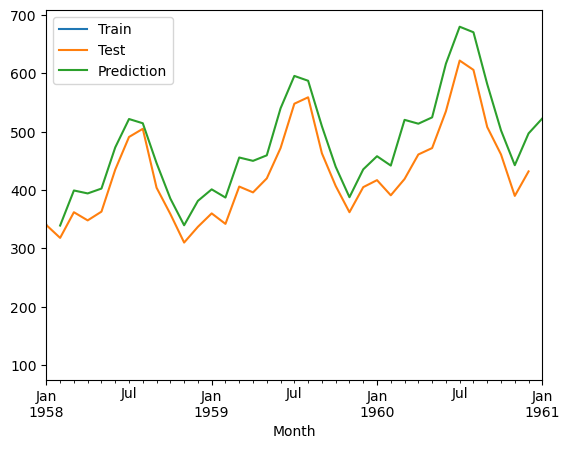

In [173]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_prediction.plot(legend =True, label = 'Prediction', xlim = ['1958-01-01', '1961-01-01'])

<Axes: xlabel='Month'>

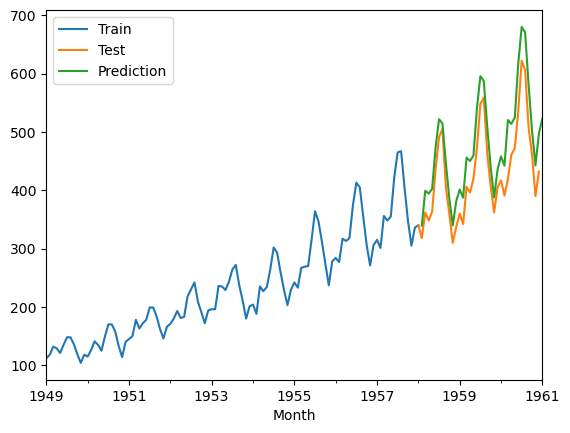

In [174]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_prediction.plot(legend =True, label = 'Prediction')

    Evaluating Forecast Predictions

In [175]:
test_prediction = fitted_model.forecast(36)  # vary the number multiple of 12, ex- 60,120

In [176]:
Predicted_Values = pd.DataFrame(test_prediction)

In [177]:
Predicted_Values = Predicted_Values.rename(columns={0: 'Predict Values'})

In [178]:
Predicted_Values.loc['1961-12-01' : ]

,Predict Values


In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [180]:
mean_squared_error(test_data,test_prediction)

5614.266734155986

In [ ]:
np.sqrt